In [7]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns

In [4]:
df  = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv',index_col=False)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Univariate Analysis using Panada Profiling

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_file("Analysis_report.html")

In [13]:
num_cols_full=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']

In [5]:
## After analysis few colums are consts so droping them like [EmployeeCount,Over18,StandardHours], No Data missing
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [6]:
X,y = df.drop(['Attrition','EmployeeNumber'],axis=1), np.where(df.Attrition=='Yes',1,0)
X.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
742,50,Travel_Rarely,804,Research & Development,9,3,Life Sciences,1,Male,64,...,3,2,0,8,5,3,1,0,0,0


## Validating the data for normal distribution for Numerical colums

In [8]:
num_cols=['DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
xn = X[num_cols]
xn.head()

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole
0,1,5993,8,11,8,5,0,4
1,8,5130,1,23,10,7,1,7
2,2,2090,6,15,7,0,0,0
3,3,2909,1,11,8,0,3,7
4,2,3468,9,12,6,2,2,2


In [12]:
ft = FunctionTransformer(func=np.log1p)
xd = ft.fit_transform(xn)
xd = pd.DataFrame(xd,columns=num_cols)
xd.head()

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole
0,0.693147,8.698514,2.197225,2.484907,2.197225,1.791759,0.000000,1.609438
1,2.197225,8.543056,0.693147,3.178054,2.397895,2.079442,0.693147,2.079442
2,1.098612,7.645398,1.945910,2.772589,2.079442,0.000000,0.000000,0.000000
3,1.386294,7.975908,0.693147,2.484907,2.197225,0.000000,1.386294,2.079442
4,1.098612,8.151622,2.302585,2.564949,1.945910,1.098612,1.098612,1.098612


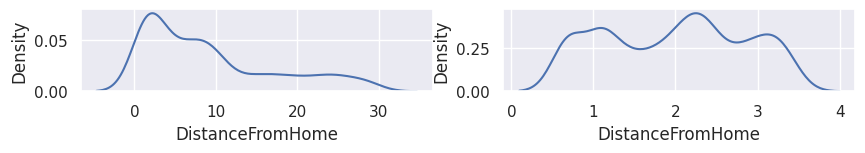

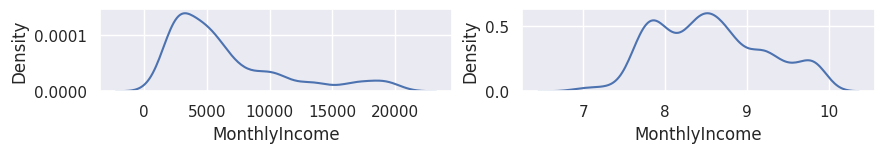

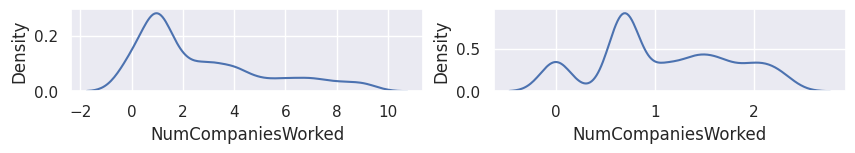

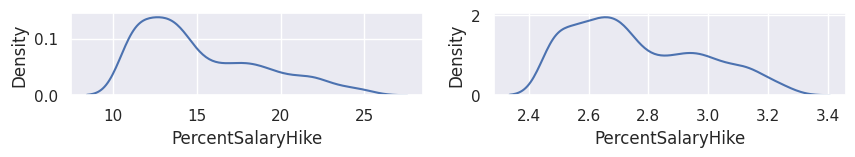

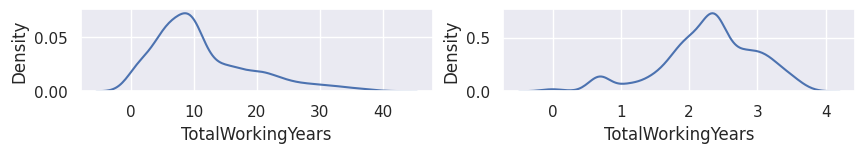

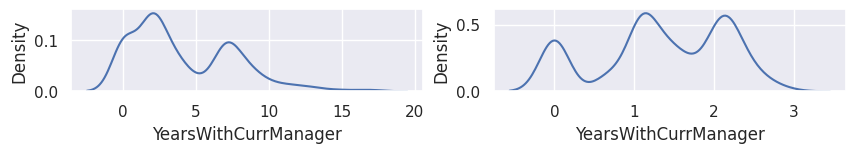

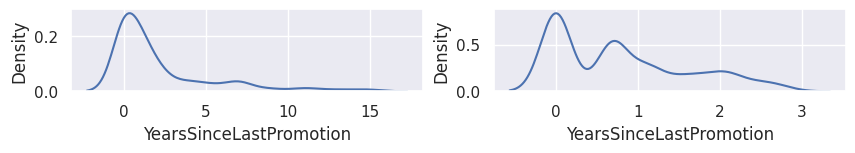

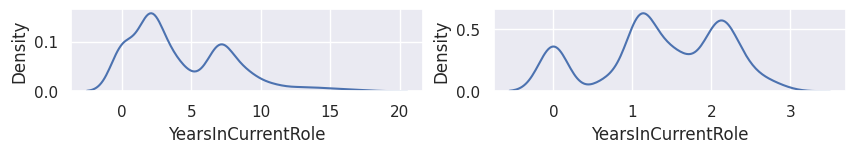

In [27]:
## plotting Dist plot before and after
sns.set(rc={"figure.figsize": (10, 10)})
count=1
for i in num_cols:
    plt.subplot(len(num_cols),2,count)
    ax = sns.kdeplot(xn[i])
    plt.subplot(len(num_cols),2,count+1)
    ax = sns.kdeplot(xd[i])
    plt.show()
    count = count +2

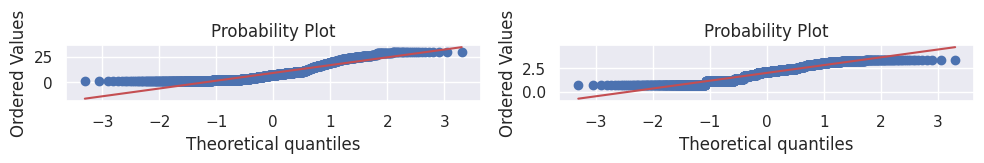

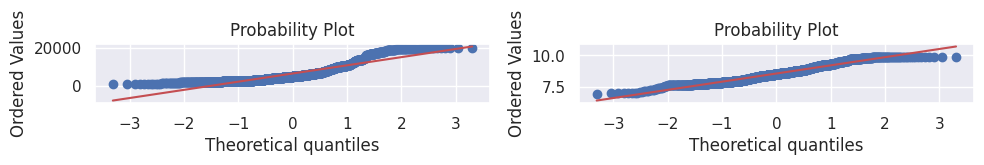

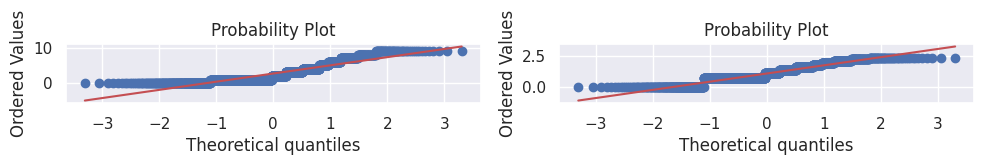

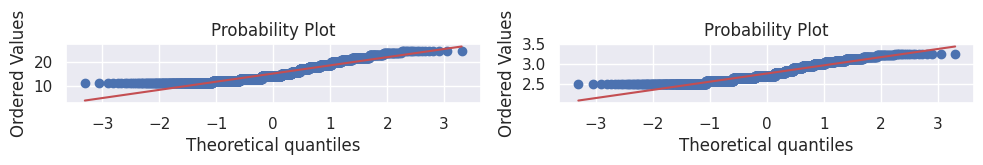

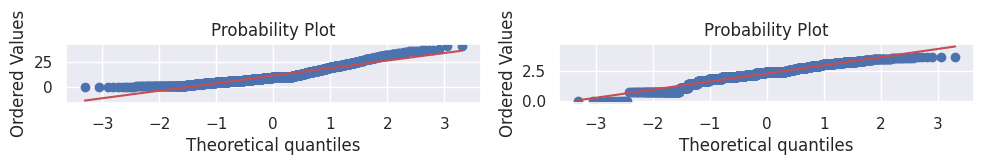

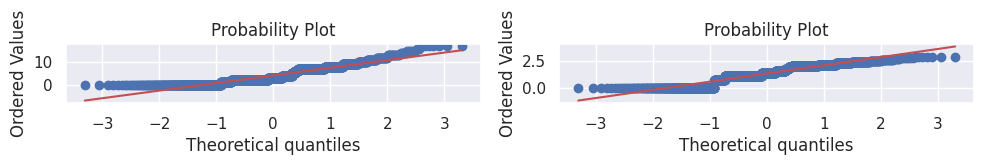

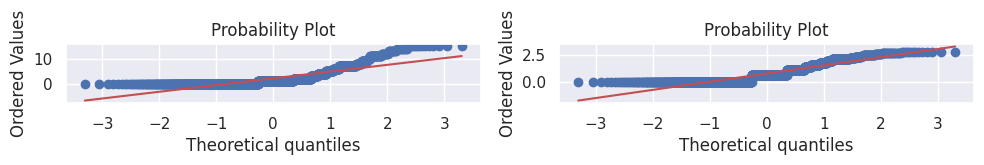

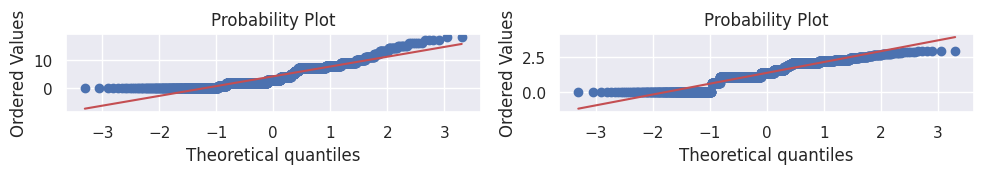

In [33]:
## plotting QQ plot before and after
sns.set(rc={"figure.figsize": (10, 10)})
count=1
for i in num_cols:
    plt.subplot(len(num_cols),2,count)
    ax = stats.probplot(xn[i],dist='norm',plot=plt)
    plt.subplot(len(num_cols),2,count+1)
    ax = stats.probplot(xd[i],dist='norm',plot=plt)
    plt.tight_layout()
    plt.show()
    count = count +2

### Clearly from above analysis we can see that after  applying log1p transformation to num_cols the right skewness is removed from the data 

## outlier detection from numerical cols

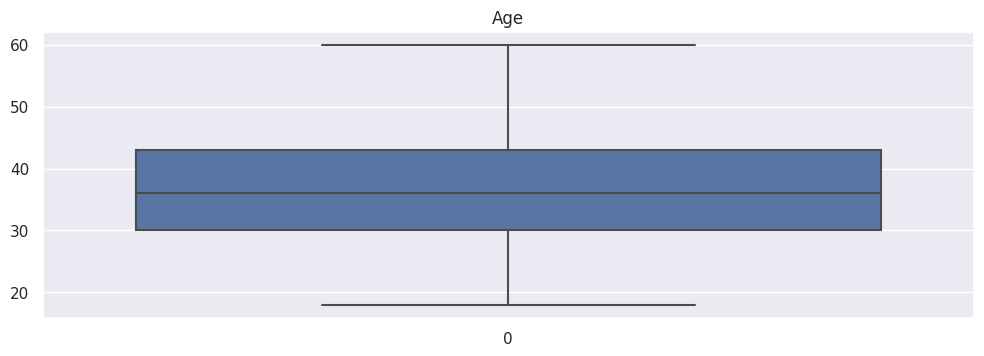

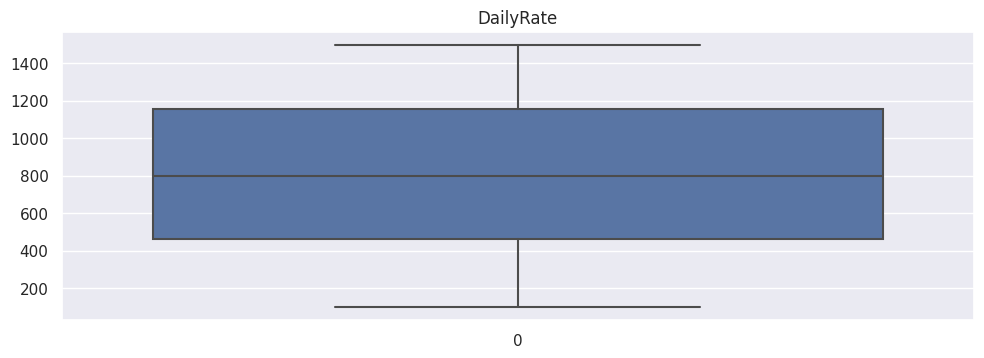

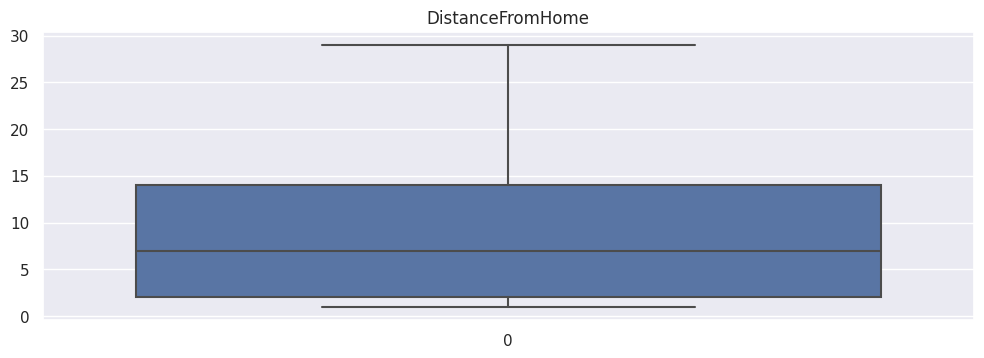

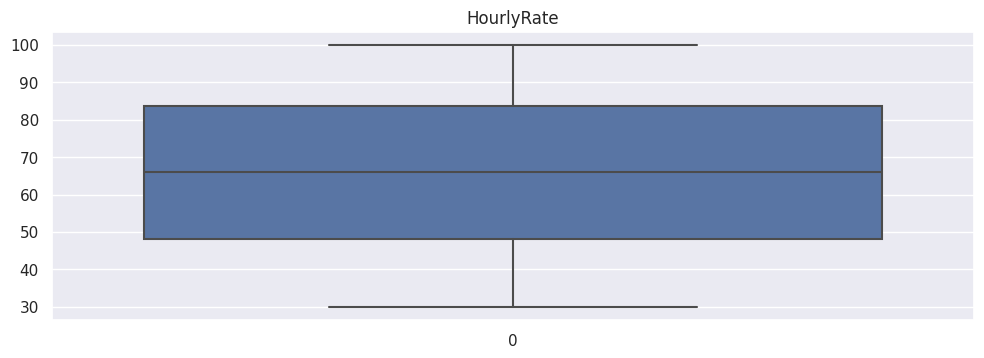

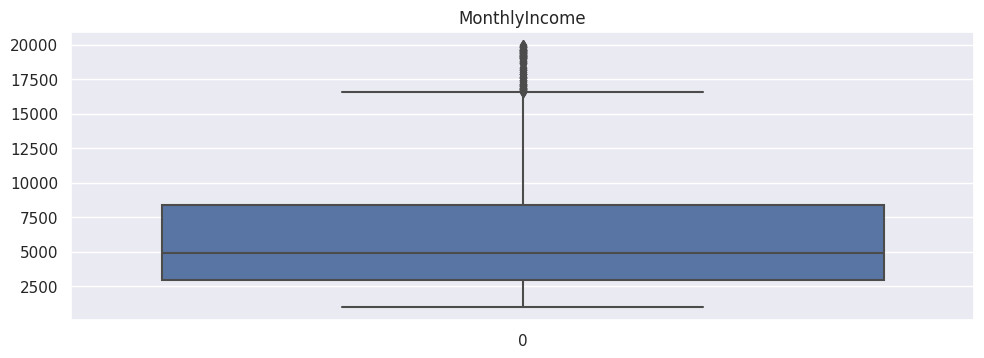

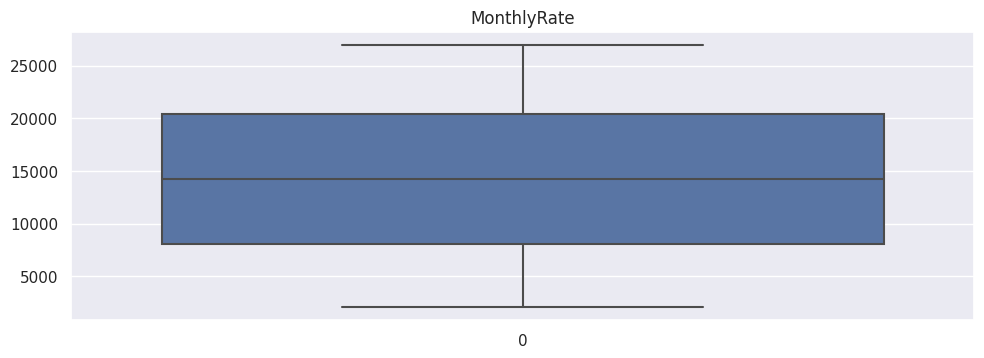

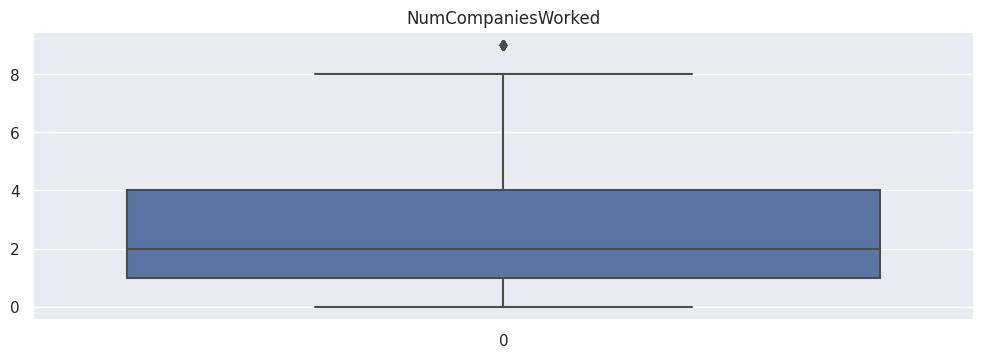

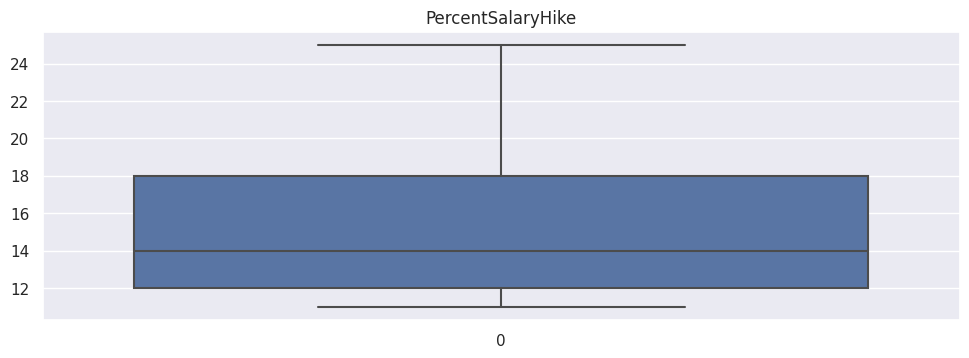

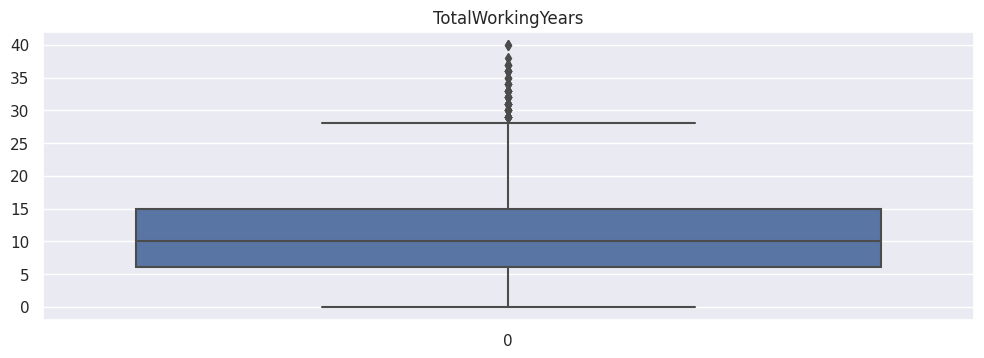

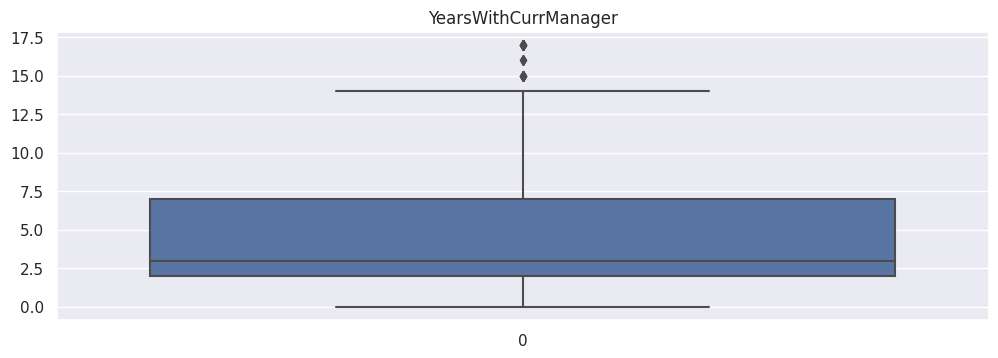

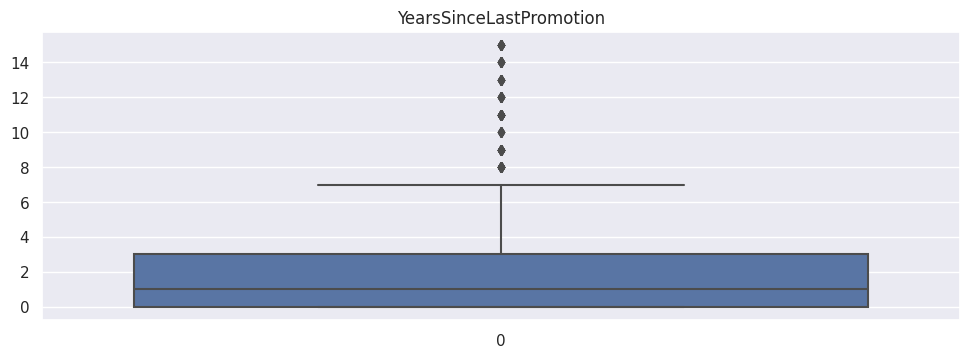

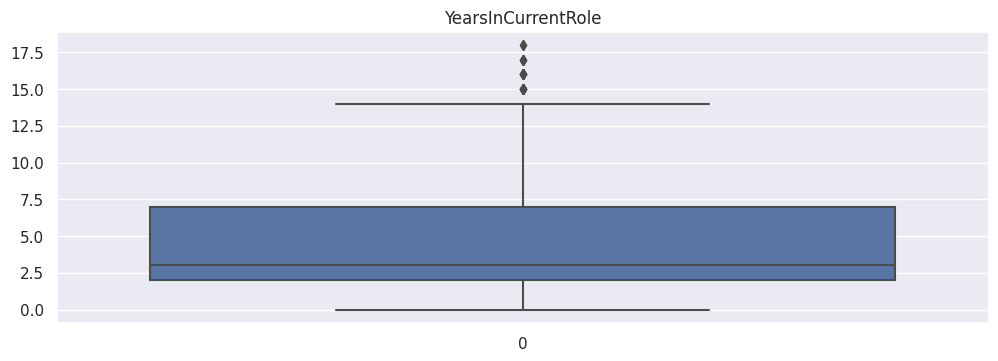

In [42]:
count=1
sns.set(rc={"figure.figsize": (10, 40)})
for i in num_cols_full:
    plt.subplot(len(num_cols_full),1,count)
    sns.boxplot(X[i])
    plt.title(i)
    plt.tight_layout()
    plt.show()
    count = count +1

## Coulumns with outlier are [MonthlyIncome,NumCompaniesWorked,TotalWorkingYear,YearWithCurrManager, YearSinceLastPromotion,YearinCurrentRole]

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [53]:
## Univarite Categorical Analysis
cat_col_full = []
for i in X.columns:
    if(X[i].dtypes in ['object']):
        cat_col_full.append(i)
cat_col_full

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Multivariate analysis

In [ ]:
sns.pairplot(df, hue='Attrition')